In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
#Metodo de interpolacion uni-dimensional
from scipy.interpolate import interp1d

In [10]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 0.6, 0.4, 0.1, -0.9, -1.0])

#Interpolacion lineal
f = interp1d(x,y)

#Interpolacion cubica
f2 = interp1d(x, y, kind="cubic")

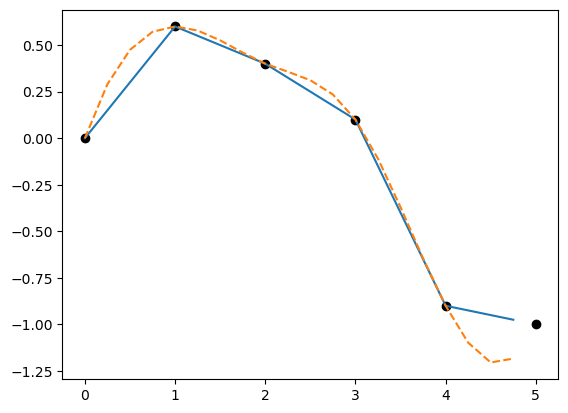

In [15]:
#Valores de x donde se evalua la interpolacion
xnew = np.arange(0, 5, 0.25)

fig, ax = plt.subplots()
ax.plot(x, y, "ok", label="data")
ax.plot(xnew, f(xnew), "-", label="Lineal")
ax.plot(xnew, f2(xnew), "--", label="Cubica")


In [21]:
#Metodo de aproximacion
#Regresion lineal
from scipy.stats import linregress

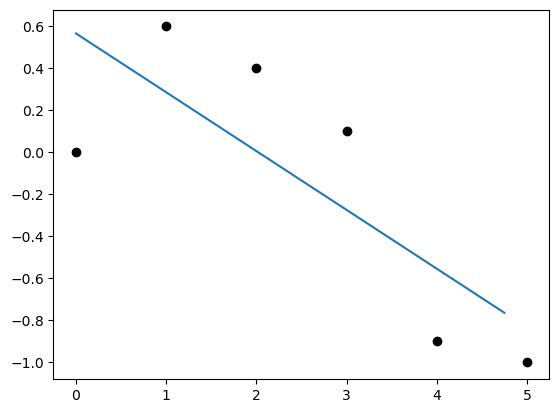

In [22]:
m, n, r, p, std_err = linregress(x, y)

fig, ax = plt.subplots()
ax.plot(x, y, "ok", label="data")
ax.plot(xnew, m*xnew+n, "-")

In [20]:
#Metodo de ajuste de curvas
from scipy.optimize import curve_fit

In [26]:
def func(x, a, b, c):
    return a*np.exp(-b*x) + c 

#Generamos datos con ruido
xdata = np.linspace(0, 4, 50)

y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2*np.random.normal(size=xdata.size)
ydata = y + y_noise

#Los datos siguen la funcion: 2.5exp(-1.3x) + 0.5

#Ajustamos los parametros de la curva
opt, covar = curve_fit(func, xdata, ydata)

print("Parametros optimizados: ", opt)
print("Covarianza:", covar)


Parametros optimizados:  [2.52916476 1.12123697 0.43232158]
Covarianza: [[ 0.01192765  0.00345848 -0.0010974 ]
 [ 0.00345848  0.01319551  0.00533002]
 [-0.0010974   0.00533002  0.00347059]]


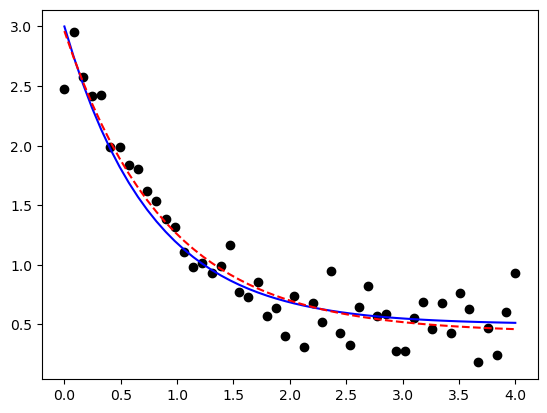

In [28]:
fig, ax = plt.subplots()

ax.plot(xdata, ydata, "ok")
ax.plot(xdata, func(xdata, 2.5, 1.3, 0.5), "-b")
ax.plot(xdata, func(xdata, *opt), "--r")